# World Happiness from 2015 to 2017

Dataset source: https://www.kaggle.com/unsdsn/world-happiness

__Context__

The World Happiness Report is a landmark survey of the state of global happiness. Governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

__Content__

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

__Questions__
  * Which region of the world is the Happiest?
  * How do the different factors relate to each other?
  * What is the impact of the different factors?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Load the data

In [2]:
years = [2015, 2016, 2017]
happiness = pd.DataFrame()
for year in years:
    filename = 'data/{0}.csv'.format(year)
    df = pd.read_csv(filename)
    df['Year'] = year
    for col_name in df.columns:
        if '.' in col_name:
            new_col_name = col_name
            new_col_name = new_col_name.replace('..',' (')
            if new_col_name[-1] == '.':
                new_col_name = new_col_name[:len(col_name)-1] + ')'
            new_col_name = new_col_name.replace('.',' ')
            df[new_col_name] = df[col_name]
    happiness = happiness.append( df, ignore_index=True )
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 470 non-null    int64  
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           470 non-null    int

### 1.1 Clean the data

In [3]:
columns_to_keep = ['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
happiness = happiness[columns_to_keep]
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           470 non-null    int64  
 1   Country                        470 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 470 non-null    int64  
 4   Happiness Score                470 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4

In [4]:
# fill in Region for 2017
happiness = happiness.sort_values(by=['Country','Year']).reset_index(drop=True)
happiness['Region'] = happiness.groupby('Country')['Region'].fillna(method='ffill')
happiness

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,2015,Albania,Central and Eastern Europe,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940
4,2016,Albania,Central and Eastern Europe,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160
...,...,...,...,...,...,...,...,...,...,...,...,...
465,2016,Zambia,Sub-Saharan Africa,106,4.795,0.612020,0.637600,0.235730,0.426620,0.114790,0.178660,2.589910
466,2017,Zambia,Sub-Saharan Africa,116,4.514,0.636407,1.003187,0.257836,0.461603,0.078214,0.249580,1.826705
467,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910
468,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700


In [5]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           470 non-null    int64  
 1   Country                        470 non-null    object 
 2   Region                         468 non-null    object 
 3   Happiness Rank                 470 non-null    int64  
 4   Happiness Score                470 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4

In [6]:
# still have 2 null values
happiness[happiness['Region'].isna()]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
168,2017,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633
409,2017,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607


In [7]:
happiness['Region'] = happiness['Region'].fillna(value='Eastern Asia')

In [8]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           470 non-null    int64  
 1   Country                        470 non-null    object 
 2   Region                         470 non-null    object 
 3   Happiness Rank                 470 non-null    int64  
 4   Happiness Score                470 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4

In [9]:
happiness.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2015.993617,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717
std,0.816907,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975
50%,2016.000000,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640
75%,2017.000000,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575
max,2017.000000,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720


## 2 Explore the data

In [10]:
happiness[happiness['Country'].isin(['United States','South Africa'])].sort_values(['Year','Happiness Rank'])

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
446,2015,United States,North America,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
378,2015,South Africa,Sub-Saharan Africa,113,4.642,0.920490,1.184680,0.276880,0.332070,0.088840,0.119730,1.719560
447,2016,United States,North America,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
379,2016,South Africa,Sub-Saharan Africa,116,4.459,1.024160,0.960530,0.186110,0.424830,0.084150,0.136560,1.642270
448,2017,United States,North America,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
380,2017,South Africa,Sub-Saharan Africa,101,4.829,1.054699,1.384789,0.187080,0.479247,0.072509,0.139362,1.510909


In [11]:
# how many countries do we have each year?
happiness.groupby('Year')['Happiness Rank'].agg(['min','max', 'count'])

,min,max,count
Year,,,
2015,1,158,158
2016,1,157,157
2017,1,155,155


In [12]:
# what regions do we have?
happiness.Region.unique()

array(['Southern Asia', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Australia and New Zealand',
       'Western Europe', 'Southeastern Asia', 'North America',
       'Eastern Asia'], dtype=object)

### 2.1 How happy are the different regions?

In [13]:
happiness.groupby(['Year','Region'])['Happiness Rank'].agg(
    num_countries='count',
    lowest_rank='min',
    highest_rank='max',
    avg_rank='mean').sort_values(['Year','avg_rank'])

num_countries  lowest_rank  \
Year Region                                                        
2015 Australia and New Zealand                    2            9   
     North America                                2            5   
     Western Europe                              21            1   
     Latin America and Caribbean                 22           12   
     Eastern Asia                                 6           38   
     Middle East and Northern Africa             20           11   
     Central and Eastern Europe                  29           31   
     Southeastern Asia                            9           24   
     Southern Asia                                7           79   
     Sub-Saharan Africa                          40           71   
2016 Australia and New Zealand                    2            8   
     North America                                2            6   
     Western Europe                              21            1   
     Latin America and Caribbean                 24           14   
     Eastern Asia                                 6           34   
     Middle East and Northern Africa             19           11   
     Central and Eastern Europe                  29           27   
     Southeastern Asia                            9           22   
     Southern Asia                                7           84   
     Sub-Saharan Africa                          38           66   
2017 Australia and New Zealand                    2            8   
     North America                                2            7   
     Western Europe                              21            1   
     Latin America and Caribbean                 22           12   
     Eastern Asia                                 6           33   
     Southeastern Asia                            8           26   
     Central and Eastern Europe                  29           23   
     Middle East and Northern Africa             19           11   
     Southern Asia                                7           80   
     Sub-Saharan Africa                          39           64   

                                      highest_rank    avg_rank  
Year Region                                                     
2015 Australia and New Zealand                  10    9.500000  
     North America                              15   10.000000  
     Western Europe                            102   29.523810  
     Latin America and Caribbean               119   46.909091  
     Eastern Asia                              100   64.500000  
     Middle East and Northern Africa           156   77.600000  
     Central and Eastern Europe                134   79.000000  
     Southeastern Asia                         145   81.222222  
     Southern Asia                             153  113.142857  
     Sub-Saharan Africa                        158  127.900000  
2016 Australia and New Zealand                   9    8.500000  
     North America                              13    9.500000  
     Western Europe                             99   29.190476  
     Latin America and Caribbean               136   48.333333  
     Eastern Asia                              101   67.166667  
     Middle East and Northern Africa           156   78.105263  
     Central and Eastern Europe                129   78.448276  
     Southeastern Asia                         140   80.000000  
     Southern Asia                             154  111.714286  
     Sub-Saharan Africa                        157  129.657895  
2017 Australia and New Zealand                  10    9.000000  
     North America                              14   10.500000  
     Western Europe                             89   27.142857  
     Latin America and Caribbean               145   50.772727  
     Eastern Asia                              100   64.833333  
     Southeastern Asia                         129   73.750000  
     Central and Eastern Europe          

#### 2.1.1 Plot every country's happiness rank over time, by region

In [14]:
df_happiness_rank_by_region = happiness[['Year','Happiness Rank','Country','Region']]

In [15]:
df_happiness_rank_by_region.Region.unique()

array(['Southern Asia', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Australia and New Zealand',
       'Western Europe', 'Southeastern Asia', 'North America',
       'Eastern Asia'], dtype=object)

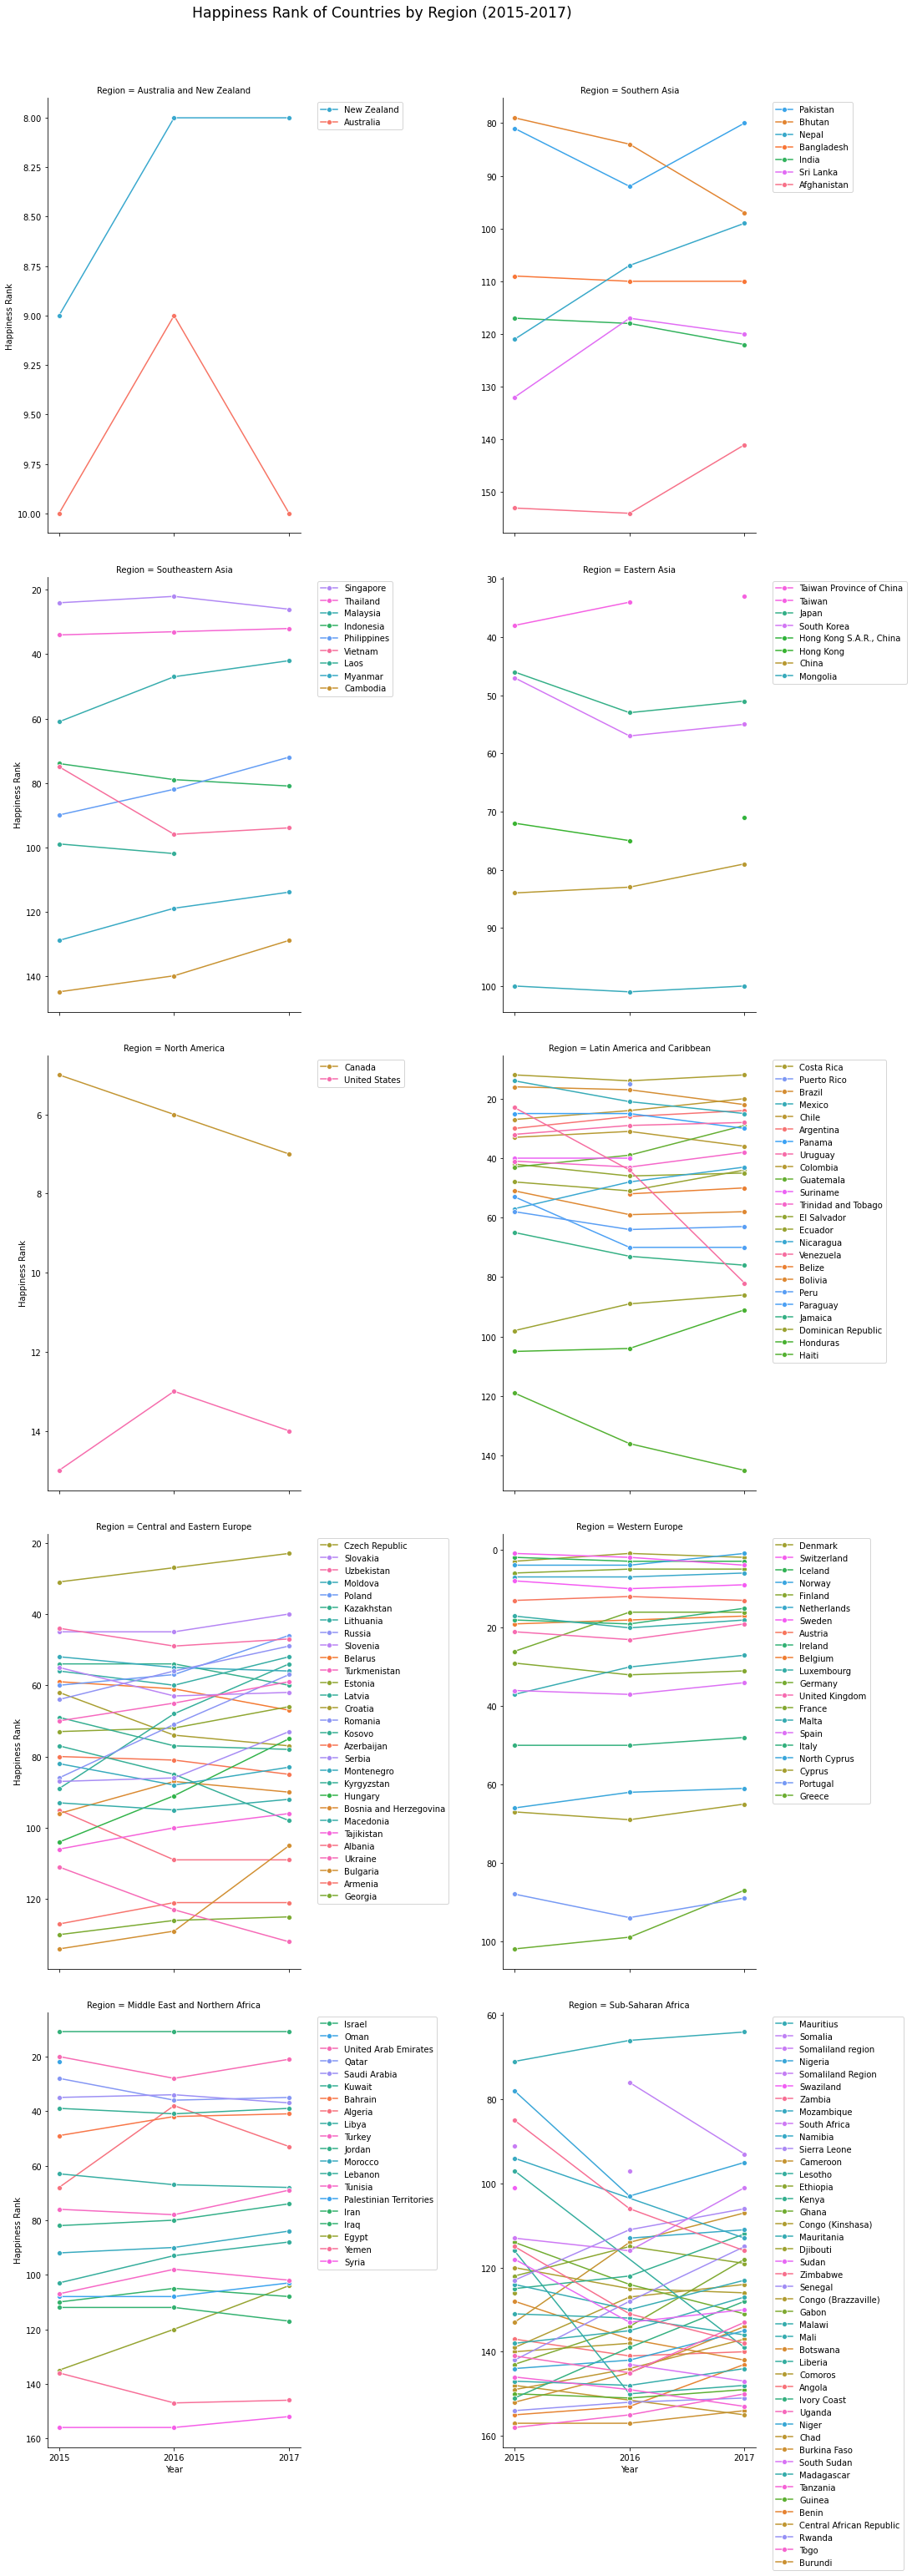

In [16]:
region_order = ['Australia and New Zealand', 'Southern Asia', 'Southeastern Asia', 'Eastern Asia', 
       'North America', 'Latin America and Caribbean', 'Central and Eastern Europe', 'Western Europe', 
       'Middle East and Northern Africa', 'Sub-Saharan Africa']

g = sns.FacetGrid(df_happiness_rank_by_region, col='Region', col_wrap=2, col_order=region_order, hue='Country', sharey=False, height=8, aspect=.8)
g = g.map(sns.lineplot, 'Year', 'Happiness Rank', marker='o')
g.fig.suptitle('Happiness Rank of Countries by Region (2015-2017)', fontsize='xx-large', y=1.03)
g.fig.subplots_adjust(wspace=0.8, hspace=0.1)
for ax in g.axes:
    ax.invert_yaxis()
    ax.set_xticks([2015,2016,2017])
    
    # order legend
    handles, labels = ax.get_legend_handles_labels()
    hl = sorted(zip(handles, labels),
           key=lambda x: (df_happiness_rank_by_region[df_happiness_rank_by_region['Country'] == x[1]]['Happiness Rank'].mean()))
    handles2, labels2 = zip(*hl)
    ax.legend(handles2, labels2, bbox_to_anchor=(1.05, 1), loc=2)

#### 2.1.2 Plot every region's happiness rank, by year

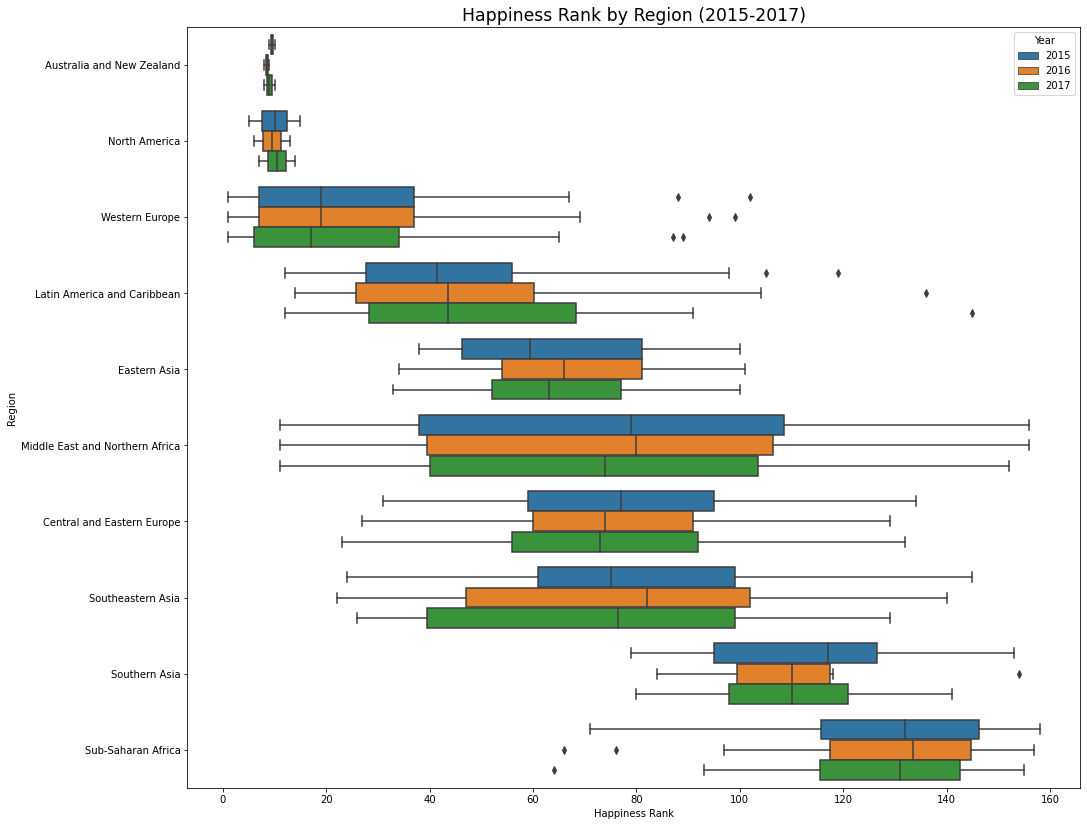

In [17]:
region_order_by_happiness_mean = happiness.groupby('Region')['Happiness Rank'].mean().sort_values()

f, ax = plt.subplots(figsize=(16,14))
g = sns.boxplot(data=happiness, x='Happiness Rank', y='Region', hue='Year', order=region_order_by_happiness_mean.index)
_ = plt.title('Happiness Rank by Region (2015-2017)', fontsize='xx-large')

#### 2.1.3 Plot every region's happiness score, by year

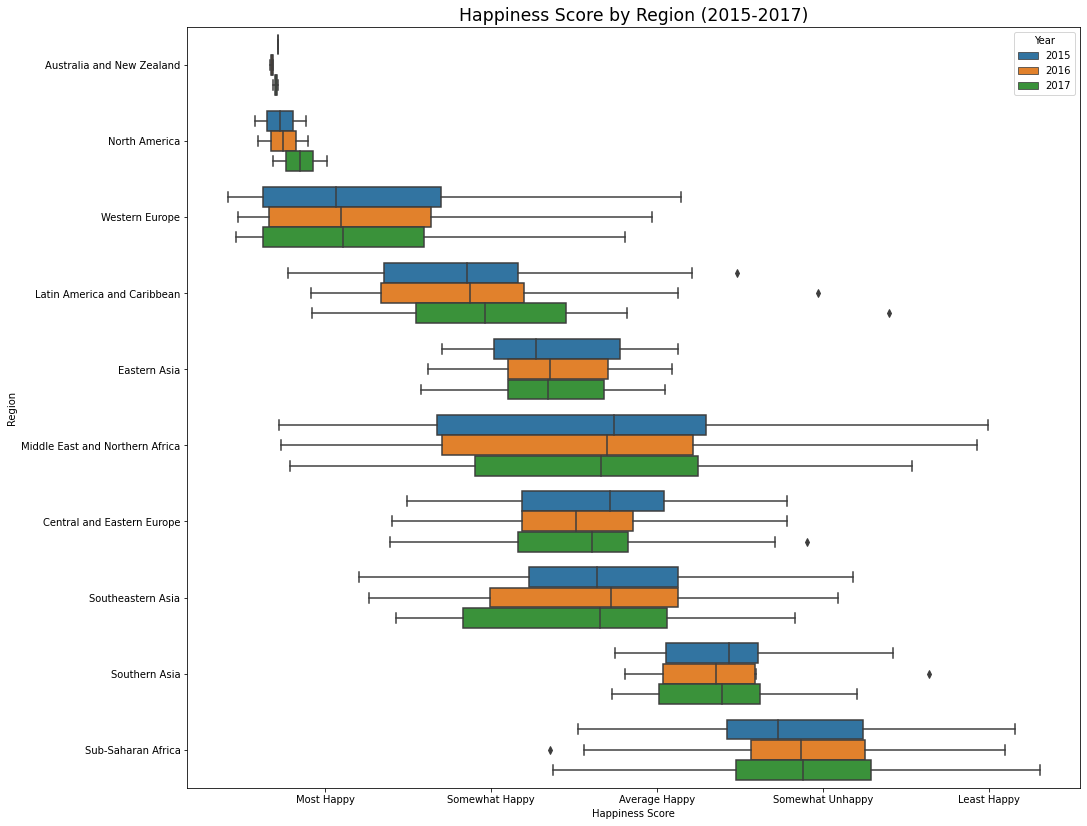

In [18]:
region_order_by_happiness_score_mean = happiness.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

f, ax = plt.subplots(figsize=(16,14))
g = sns.boxplot(data=happiness, x='Happiness Score', y='Region', hue='Year', order=region_order_by_happiness_score_mean.index)
ax.set_xticklabels(['Unhappy','Least Happy','Somewhat Unhappy','Average Happy','Somewhat Happy','Most Happy'])
ax.invert_xaxis()
_ = plt.title('Happiness Score by Region (2015-2017)', fontsize='xx-large')

#### 2.1.4 Summary on Region Happiness

  * We can see that the region `Sub-Saharan Africa` has the lowest Happiness Scores, followed by the region `Southern Asia`. 
  * `Sub-Saharan Africa` contains the most countries (around 40 countries).
  * The region `Middle East and Northern Africa` has the largest spread in Happiness Scores. Surprisingly, it contains a similar number of countries as `Western Europe` and `Latin America and Caribbean`, both regions of which have a much smaller spread in Happiness Scores.
  * The regions `Australia and New Zealand` and `North America` can barely be called regions, considering each region only contains two countries each. Could geography (i.e. minimal neighbors) play a role in their high happiness?

### 2.2 How do different factors relate to the Happiness Score?

In [19]:
# let's first look at the correlations between 'Happiness Score' and the other features
happiness_corr = happiness.drop(columns=['Year','Happiness Rank']).corr()[['Happiness Score']]
# print the full data frame
with pd.option_context('display.max_rows', None):
    display(happiness_corr.sort_values(by=['Happiness Score']))

,Happiness Score
Generosity,0.163562
Trust (Government Corruption),0.406340
Dystopia Residual,0.489747
Freedom,0.560353
Family,0.636532
Health (Life Expectancy),0.748040
Economy (GDP per Capita),0.785450
Happiness Score,1.000000


In [20]:
# define useful function to create scatterplots of Median Sale Price against desired columns
# show regression and accept R coefficient values
def scatterplotswithreg(columns, ncol=None, figsize=(15, 8), annotateR=False, rValues={}):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        g = sns.regplot(x = col, y = 'Happiness Score', data=df, ax=ax)
        if annotateR:
            g.annotate("r = {:.2f}".format(rValues[col]), xy=(.7,.1), xycoords=ax.transAxes)
        ax.set(xlabel=col, ylabel='Happiness Score')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [21]:
features = [c for c in happiness.columns if c not in ['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score']]

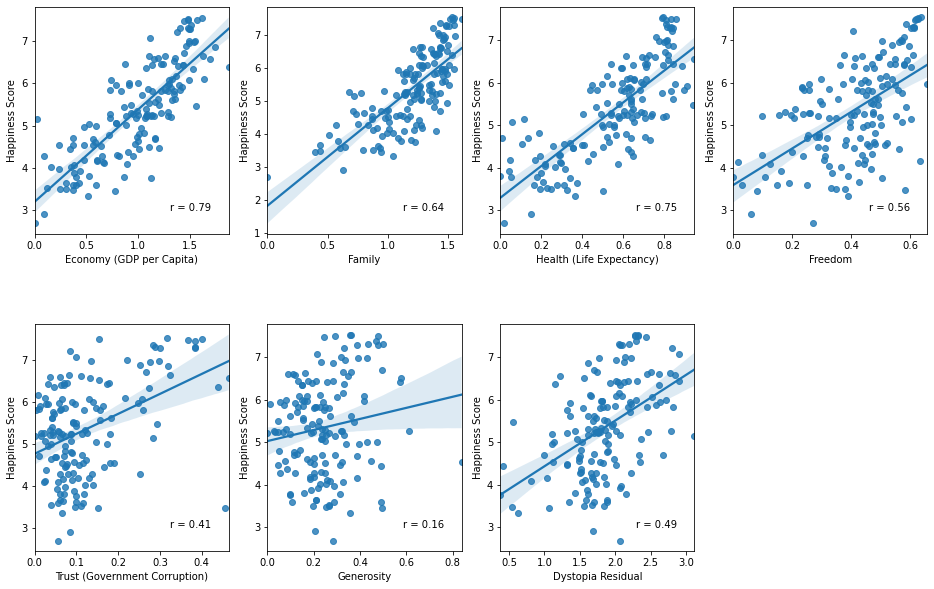

In [22]:
# pass in correlation coefficient so it can be annotated
scatterplotswithreg(features, ncol=4, figsize=(16, 10), annotateR=True, rValues=happiness_corr.to_dict()['Happiness Score'])

#### 2.2.1 Points to note

  * Not much correlation between `Generosity` and `Happiness Score`
  * As expected, strong correlation between `Happiness Score` and `Economy (GDP per Capita)` as well as `Health (Life Expectancy)`
  * When there is not much `Government Corruption`, Happiness appears to depend on other factors, but when there is more `Government Corruption`, then Happiness is more strongly affected.

### 2.3 What is the relationship between the different factors?

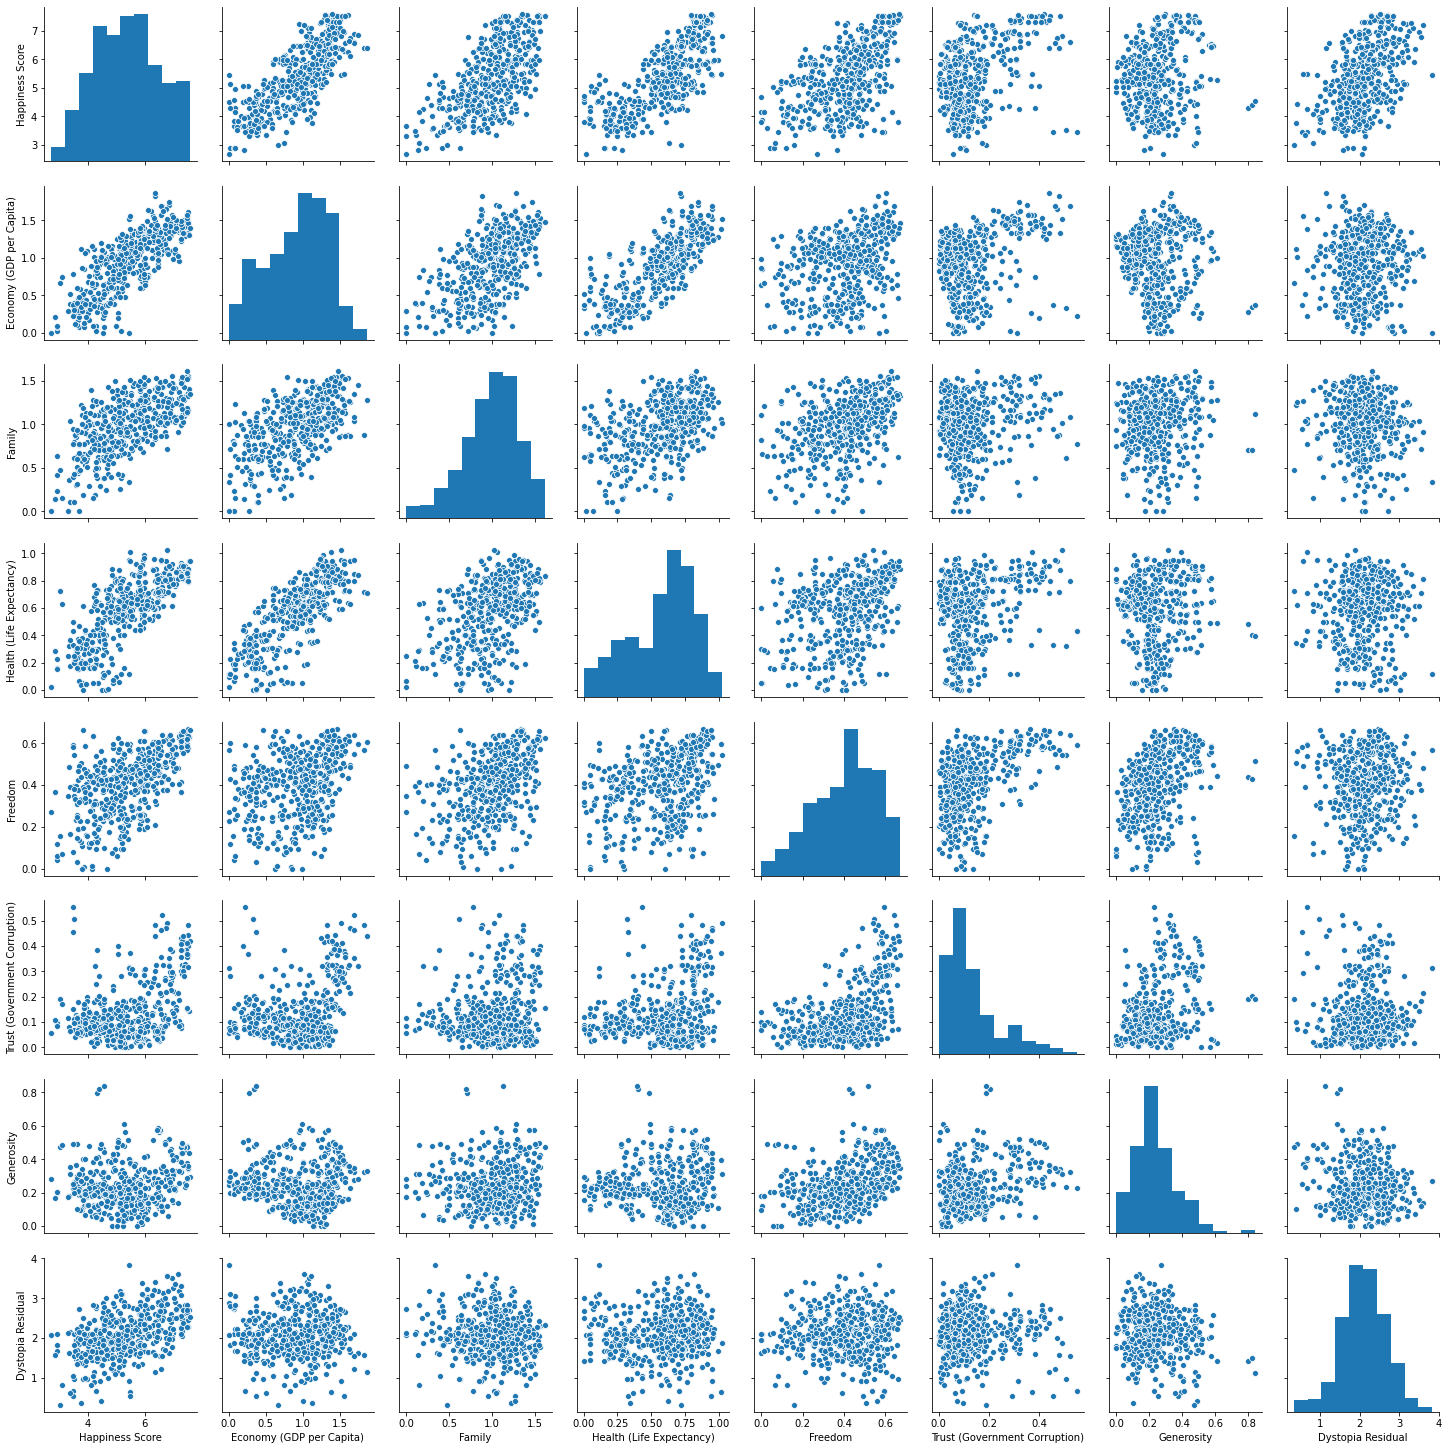

In [23]:
g = sns.pairplot(happiness.drop(columns=['Year','Happiness Rank']))

#### 2.3.1 Plot the correlation between different factors

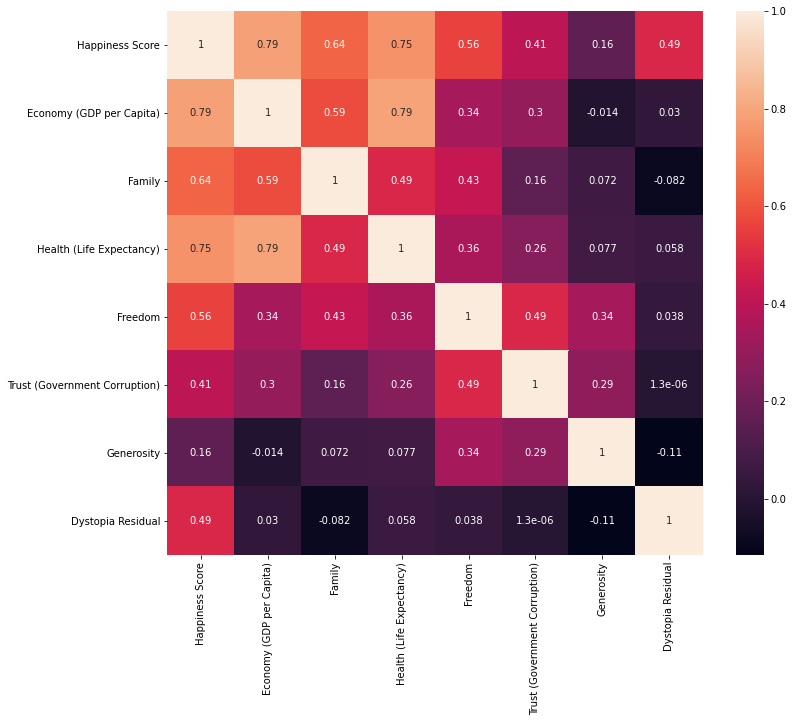

In [24]:
plt.subplots(figsize=(12,10))
sns.heatmap(happiness.drop(columns=['Year','Happiness Rank']).corr(),annot=True);

#### 2.3.2 Did the correlations change over time?

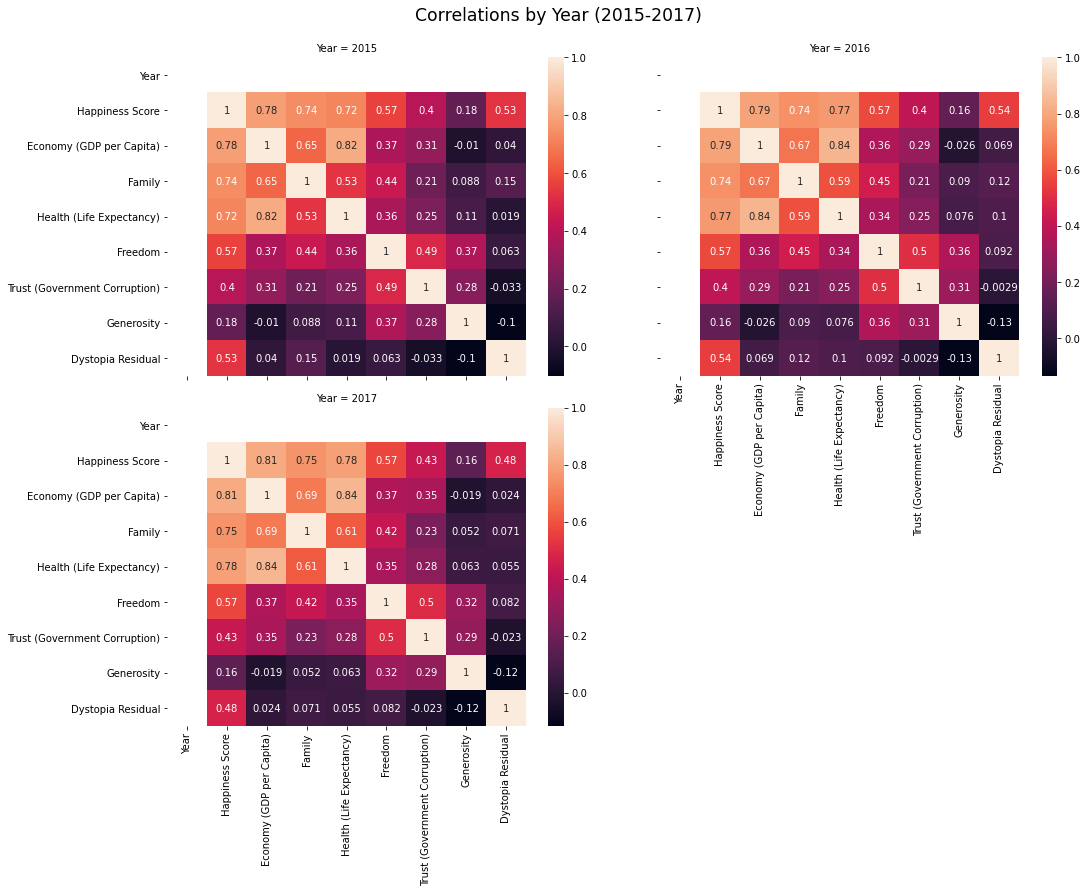

In [25]:
g = sns.FacetGrid(happiness.drop(columns=['Happiness Rank']), col='Year', col_wrap=2, height=6, aspect=1.3)
_ = g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), annot=True))
g.fig.suptitle('Correlations by Year (2015-2017)', fontsize='xx-large', y=1.03)
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)

#### 2.3.3 Do the correlations differ by region?

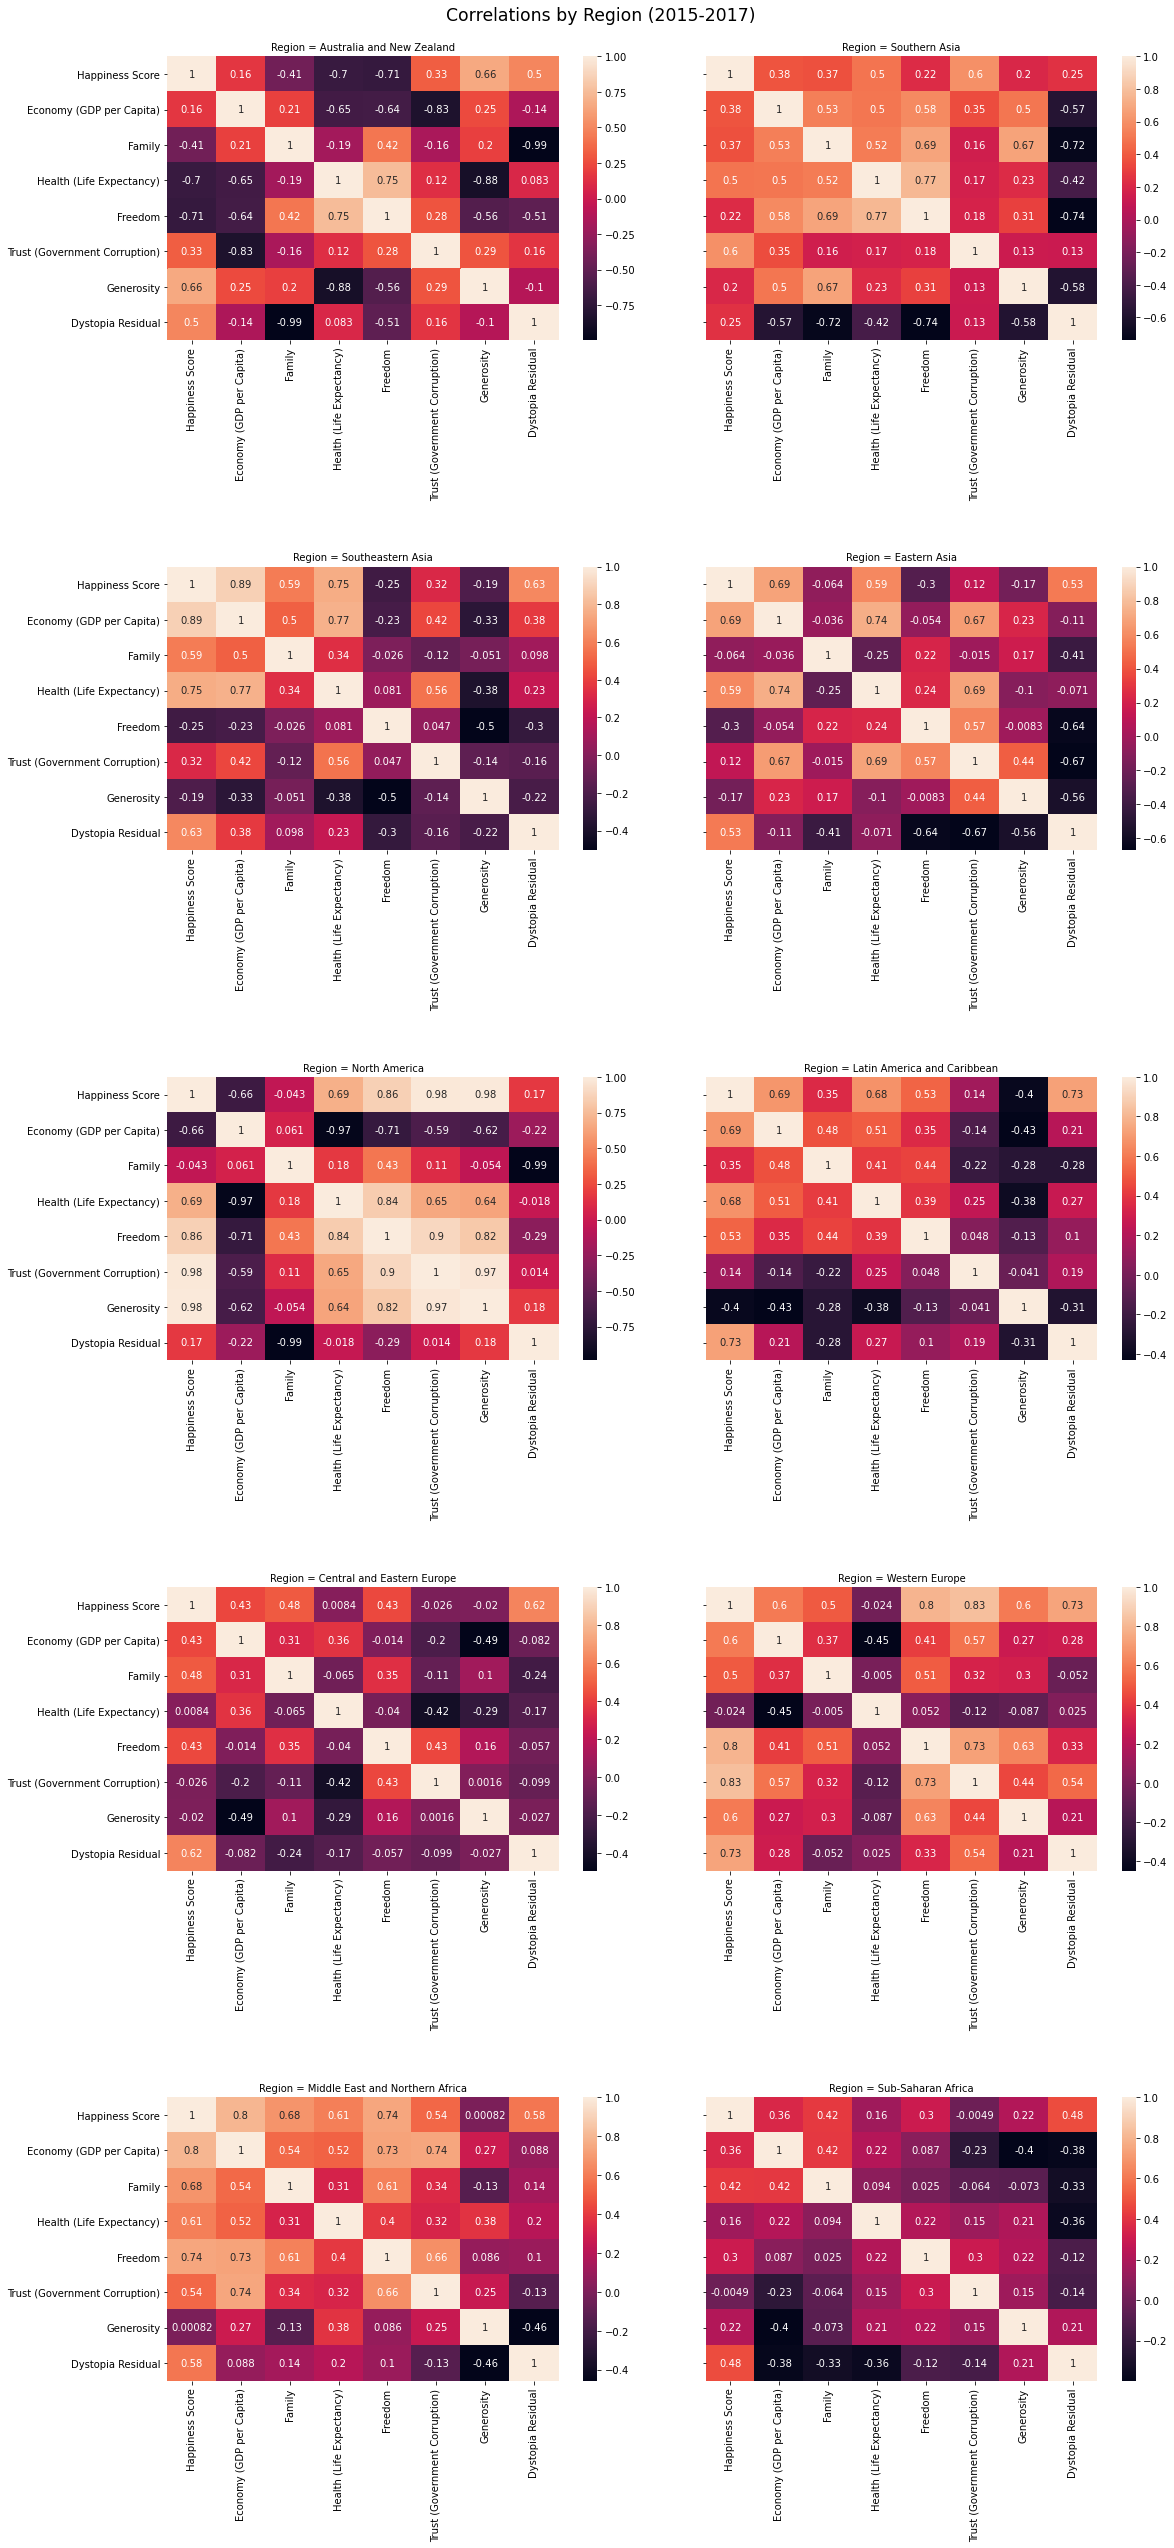

In [26]:
g = sns.FacetGrid(happiness.drop(columns=['Year','Happiness Rank']), col='Region', col_wrap=2, col_order=region_order, height=7, aspect=1.2)
_ = g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), annot=True))
g.fig.suptitle('Correlations by Region (2015-2017)', fontsize='xx-large', y=1.01)
g.fig.subplots_adjust(wspace=0.1, hspace=0.8)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90, labelbottom=True)

#### 2.3.4 Points of interest

  * Different factors appear to matter to regions. For example, with regards to `Happiness Score`, for `Australia and New Zealand`, the strongest correlation is with `Generosity`, but in `Southern Asia`, that is the weakest correlation.
  * `Generosity` is actually strongly of interest; for those regions with generally high Happiness Scores, it appears to correlate strongly, but is much weaker for those regions with lower Happiness Scores. Is this an economic result or a cultural divide?